Réalisé par : 
- **Anthony Menghi**
- **Mehdi Ghoulalm**

### Explication du dataset
| Variable   | Description            | Valeurs                              |
|------------|------------------------|--------------------------------------|
| survival   | Survie                 | 0 = Non, 1 = Oui                     |
| pclass     | Classe du billet       | 1 = 1ère, 2 = 2nde, 3 = 3ème         |
| sex        | Sexe                   |                                      |
| Age        | Âge en années          |                                      |
| sibsp      | # de frères/soeurs     |                                      |
| parch      | # de parents/enfants   |                                      |
| ticket     | Numéro de billet       |                                      |
| fare       | Prix du billet         |                                      |
| cabin      | Numéro de cabine       |                                      |
| embarked   | Port d'embarquement    | C = Cherbourg, Q = Queenstown, S = Southampton |


### Importations

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Ignorer les avertissements spécifiques à la conversion des données
warnings.filterwarnings(action='ignore', category=UserWarning)

### Charge le DataFrame avec les données

In [2]:
data_train = pd.read_csv('Titanic/train.csv')
data_test = pd.read_csv('Titanic/test.csv')

In [3]:
# afficher les 10 premières lignes
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Indexation des données

In [4]:
# PassengerId devient l'index
data_train.set_index('PassengerId', inplace=True, drop=True)
data_train

data_test.set_index('PassengerId', inplace=True, drop=True)

### Analyse des variables

In [5]:
# affiche les colonnes
data_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# affiche une analyse statistique des données
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# compte le nombre de valeurs pour chaque colonne
data_train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

### Préparation des données

In [52]:
# Regroupement de données par lien de parenté (Fare, SibSp, Parch)
def parse_model_1(train_file):
    data_train = pd.read_csv(train_file)
    data_train.set_index('PassengerId', inplace=True, drop=True)
    X = data_train[['Fare','SibSp', 'Parch']]
    y = data_train['Survived']
    return X, y

X_train, y_train = parse_model_1('Titanic/train.csv')
X_train.head()

# y = l'index du dataframe
# X = les colonnes du dataframe

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


In [9]:
def compute_score(classifier, X_train, y_train):
    # split X 
    # cross_val_score permet de calculer la précision du classifieur
    score = cross_val_score(classifier, X_train, y_train, cv=5)

    # fit permet d'entrainer le classifieur et score de calculer la précision
    classifier.fit(X_train, y_train)
    return round(score.mean(), 3)

**À savoir** :
la différence entre fit et cross_val_score est la suivante: 
- cross_val_score entraine le classifieur plusieurs fois sur des sous-ensembles de données différents et calcule la précision moyenne sur ces sous-ensembles de données.

- fit entraine le classifieur sur l'ensemble des données et calcule la précision sur l'ensemble des données. 

In [10]:
score= compute_score(LogisticRegression(), X_train, y_train)
score

0.675

### Etude des variables

In [11]:
# Création de deux dataframes pour les personnes ayant survécu et celles étant décédées
survived = data_train[data_train['Survived'] == 1]
died = data_train[data_train['Survived'] == 0]

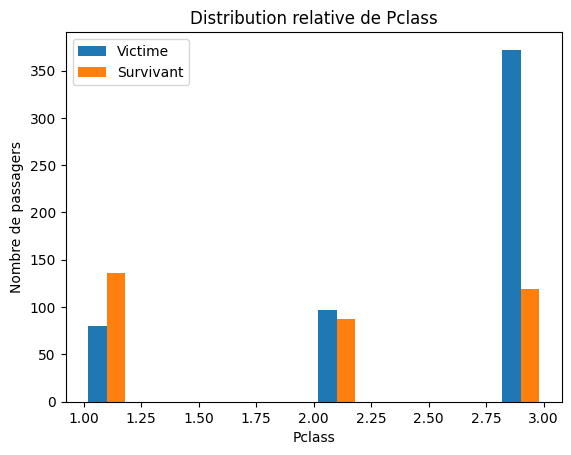

In [12]:
def plot_hist(data, variable):
    plt.hist([
        died[variable],
        survived[variable]
    ], label=['Victime', 'Survivant'])
    plt.legend(loc='upper left')
    plt.title(f'Distribution relative de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Nombre de passagers')
    plt.show()
plot_hist(data_train, 'Pclass')

##### Question 3.2.2

La variable Pclass est importante car elle distingue clairement la discrimination des classes, on voit que le 3ème classe est celle qui contient le plus de décès.

In [13]:
dummies = pd.get_dummies(data_train['Pclass'], prefix='split_Pclass')
# get_dummies permet de transformer une variable catégorielle en une variable numérique

In [50]:
# Ecrire la fonction parse_model_2 en injectant les instructions précédentes dans la
# fonction parse_model_1 de la question 2.1

def parse_model_2(train_file, injected_data):
    # Utilisation de la fonction parse_model_1
    data = parse_model_1(train_file)
    # Injection des nouvelles données
    new_data = pd.concat([data[0], injected_data], axis=1)
    return new_data, data[1]

X_train_2, y_train_2 = parse_model_2('Titanic/train.csv', dummies)
X_train_2.head()

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


In [15]:
score_2 = compute_score(LogisticRegression(), X_train_2, y_train_2)
score_2

0.694

En ajoutant la variable Pclass, on améliore la précision du modèle.

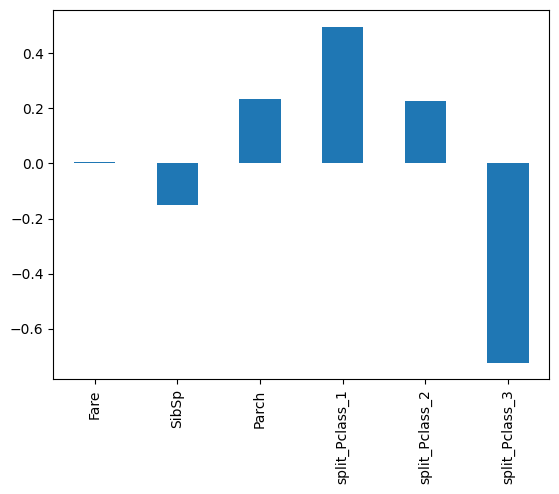

In [16]:
def plot_lr_coefs(X, lr):
    coefs = pd.Series(lr.coef_[0], index=X.columns)
    coefs.plot(kind='bar')
    plt.show()

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_2, y_train_2)
plot_coef = plot_lr_coefs(X_train_2, lr)
plot_coef

#### Question 3.4.4

D'après le graphique, on confirme bien que `Pclass` est une variable importante, et en particulier les gens de la 3ème classe.
En effet, les variables de `Pclass` ont toutes un poids positif ou négatif assez voir très important.

### Etude plus fine des variables

#### Création d’un nouveau jeu de données avec les variable Sex et Age

In [17]:
# Ecrire la fonction parse_model_3 en injectant les instructions permettant s’insérer les variables Age et Sex  dans la fonction parse_model_2 de la question 3.3.1

def parse_model_3(train_file, injected_data):
    # Utilisation de la fonction parse_model_2
    data = parse_model_2(train_file, injected_data)

    # Injection des nouvelles données
    new_data = pd.concat([data[0], data_train[['Age', 'Sex']]], axis=1)
    
    # Gestion des valeurs manquantes pour la variable 'Age'
    new_data['Age'].fillna(new_data['Age'].median(), inplace=True)
    
    # Gestion des variables 'Sex' (dummy variables)
    sex_dummies = pd.get_dummies(new_data['Sex'], prefix='Sex')
    new_data = pd.concat([new_data, sex_dummies], axis=1)
    new_data.drop('Sex', axis=1, inplace=True)

    return new_data, data[1]

X_train_3, y_train_3 = parse_model_3('Titanic/train.csv', dummies)
X_train_3.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,Age,Sex_female,Sex_male
PassengerId,,,,,,,,,
1,7.2500,1,0,False,False,True,22.0,False,True
2,71.2833,1,0,True,False,False,38.0,True,False
3,7.9250,0,0,False,False,True,26.0,True,False
4,53.1000,1,0,True,False,False,35.0,True,False
5,8.0500,0,0,False,False,True,35.0,False,True


#### Calcul du nouveau modèle et évaluation du nouveau score

In [18]:
score_3 = compute_score(LogisticRegression(), X_train_3, y_train_3)
score_3

0.787

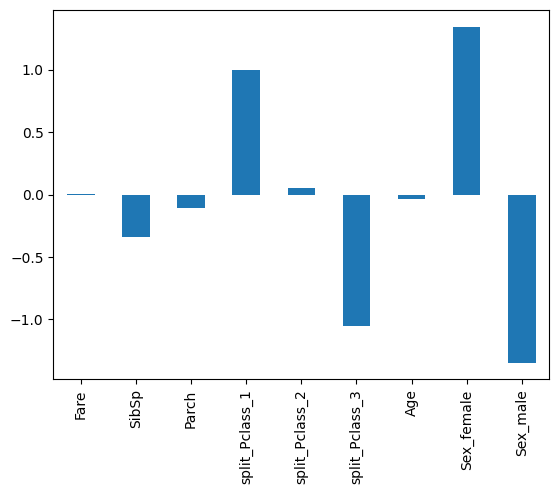

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_3, y_train_3)
plot_coef = plot_lr_coefs(X_train_3, lr)
plot_coef

#### Question 4.2.3 Quelles conclusions faites vous pour ce qui concerne l’amélioration du modèle

D'après le graphique, on confirme bien que `Sex` est une variable importante, nous pouvons voir le poids très important de la variable `Sex` dans le modèle.

### Etude de la variable Age et nouveau modèle

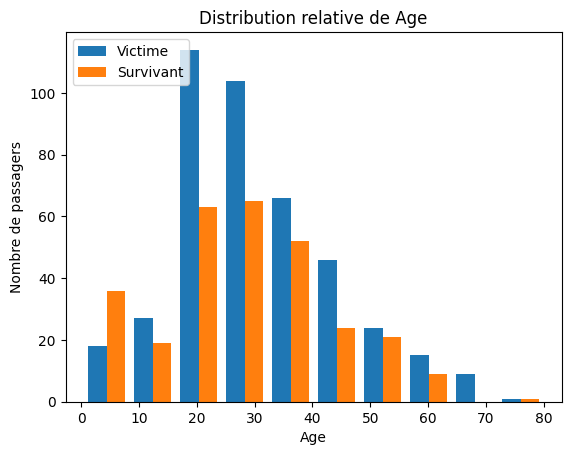

In [20]:
plot_hist(data_train, 'Age')

#### Que remarquer vous  pour les enfants et et les 20 et 30 ans ?
Nous pouvons voir que les enfants ont une probabilité de survie plus élevée que les autres, et que les personnes de 20 et 30 ans ont une probabilité de survie plus faible que les autres.

In [21]:
X_train_3['is_child'] = X_train_3.Age < 8
X_train_3.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,Age,Sex_female,Sex_male,is_child
PassengerId,,,,,,,,,,
1,7.2500,1,0,False,False,True,22.0,False,True,False
2,71.2833,1,0,True,False,False,38.0,True,False,False
3,7.9250,0,0,False,False,True,26.0,True,False,False
4,53.1000,1,0,True,False,False,35.0,True,False,False
5,8.0500,0,0,False,False,True,35.0,False,True,False


In [22]:
score_train_4 = compute_score(LogisticRegression(), X_train_3, y_train_3)
score_train_4

0.797

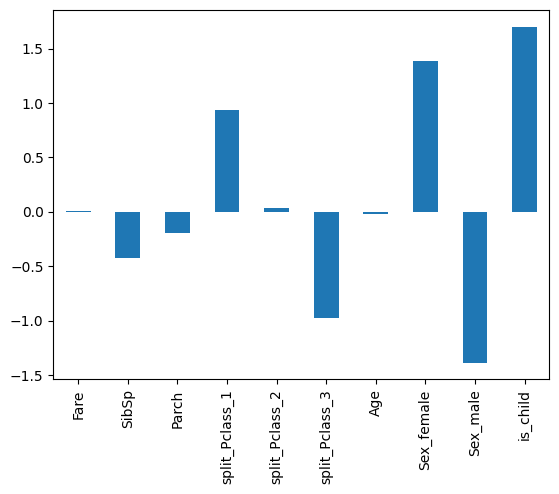

In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_3, y_train_3)
plot_coef = plot_lr_coefs(X_train_3, lr)
plot_coef

### Modèles non linéaires

#### Modèles de type Random Forest

In [24]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_3, y_train_3)
score_rf = model.score(X_train_3, y_train_3)
score_rf

0.8383838383838383

#### Question 5.1.2 : Que remarquez vous ?
Nous pouvons voir que le modèle de type Random Forest est plus précis que le modèle de régression logistique.

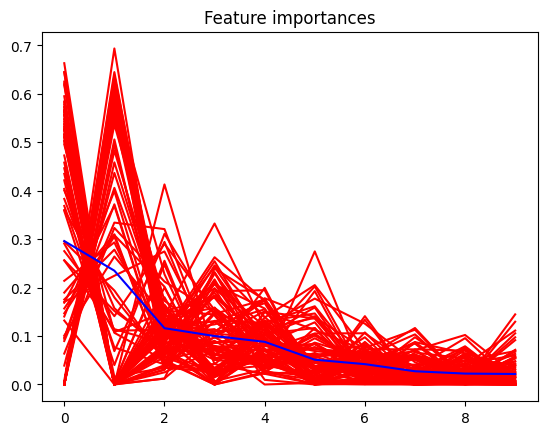

1. feature Sex_male (0.2961441726975672)
2. feature Sex_female (0.23498967065484147)
3. feature Fare (0.11621420439026536)
4. feature split_Pclass_3 (0.10000582332766106)
5. feature Age (0.0880770751016704)
6. feature split_Pclass_1 (0.05113035365888603)
7. feature SibSp (0.04198369391834524)
8. feature is_child (0.02730895855003579)
9. feature Parch (0.02250611135683438)
10. feature split_Pclass_2 (0.021639936343893135)


In [25]:
def classifier_importance(X, clf):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title("Feature importances")
    for tree in clf.estimators_:
        plt.plot(range(X.shape[1]), tree.feature_importances_[indices], "r")
    plt.plot(range(X.shape[1]), importances[indices], "b")
    plt.show()
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

classifier_importance(X_train_3, model)

On peut se rendre compte que les variables les plus importantes sont : 
- `Sex_male` & `Sex_female`
- `Fare`
- `split_Pclass_3`

In [26]:
title = data_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
title.value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [27]:
cabin = data_train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
cabin.value_counts()

Cabin
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [28]:
# Question 5.3.3 
def parse_model_5(train_file, injected_data):
    # Utilisation de la fonction parse_model_3
    data = parse_model_3(train_file, injected_data)

    # Injection des nouvelles données
    new_data = pd.concat([data[0], title, cabin], axis=1)
    
    # Gestion des variables 'Title' (dummy variables)
    title_dummies = pd.get_dummies(new_data['Name'], prefix='Title')
    new_data = pd.concat([new_data, title_dummies], axis=1)
    new_data.drop('Name', axis=1, inplace=True)

    # Gestion des variables 'Cabin' (dummy variables)
    cabin_dummies = pd.get_dummies(new_data['Cabin'], prefix='Cabin')
    new_data = pd.concat([new_data, cabin_dummies], axis=1)
    new_data.drop('Cabin', axis=1, inplace=True)

    return new_data, data[1]

X_train_5, y_train_5 = parse_model_5('Titanic/train.csv', dummies)
X_train_5.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,Age,Sex_female,Sex_male,Title_Capt,...,Title_the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,1,0,False,False,True,22.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,71.2833,1,0,True,False,False,38.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,7.9250,0,0,False,False,True,26.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,53.1000,1,0,True,False,False,35.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
5,8.0500,0,0,False,False,True,35.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
score_5 = compute_score(LogisticRegression(), X_train_5, y_train_5)
score_5

0.825

Nous pourvons remarquer qu'avec l'ajout de Name et de Cabin dans le modèle, la précision augmente.

In [30]:
surname = data_train['Name'].apply(lambda x: x.split(',')[0].strip())
surname.value_counts()

Name
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [31]:
embarked = data_train['Embarked'].apply(lambda x: x if pd.notnull(x) else 'S')
embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [32]:
ticket = data_train['Ticket'].apply(lambda x: x.split(' ')[0].strip() if len(x.split(' ')) > 1 else 'X')
ticket.value_counts()

Ticket
X             665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [33]:
# Améliorer le remplissage des valeurs manquantes
def parse_model_6(train_file, injected_data):
    # Utilisation de la fonction parse_model_5
    data = parse_model_5(train_file, injected_data)

    # Injection des nouvelles données
    new_data = pd.concat([data[0], surname, embarked, ticket], axis=1)
    
    # Gestion des variables 'Surname' (dummy variables)
    surname_dummies = pd.get_dummies(new_data['Name'], prefix='Surname')
    new_data = pd.concat([new_data, surname_dummies], axis=1)
    new_data.drop('Name', axis=1, inplace=True)

    # Gestion des variables 'Embarked' (dummy variables)
    embarked_dummies = pd.get_dummies(new_data['Embarked'], prefix='Embarked')
    new_data = pd.concat([new_data, embarked_dummies], axis=1)
    new_data.drop('Embarked', axis=1, inplace=True)

    # Gestion des variables 'Ticket' (dummy variables)
    ticket_dummies = pd.get_dummies(new_data['Ticket'], prefix='Ticket')
    new_data = pd.concat([new_data, ticket_dummies], axis=1)
    new_data.drop('Ticket', axis=1, inplace=True)
    return new_data, data[1]

X_train_6, y_train_6 = parse_model_6('Titanic/train.csv', dummies)
X_train_6.head()


,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,Age,Sex_female,Sex_male,Title_Capt,...,Ticket_SOTON/O2,Ticket_SOTON/OQ,Ticket_STON/O,Ticket_STON/O2.,Ticket_SW/PP,Ticket_W./C.,Ticket_W.E.P.,Ticket_W/C,Ticket_WE/P,Ticket_X
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,1,0,False,False,True,22.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,71.2833,1,0,True,False,False,38.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.9250,0,0,False,False,True,26.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,53.1000,1,0,True,False,False,35.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,8.0500,0,0,False,False,True,35.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [34]:
score_6 = compute_score(LogisticRegression(), X_train_6, y_train_6)
score_6

0.823

In [35]:
# Use Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_6, y_train_6)
score_gb = model.score(X_train_6, y_train_6)
score_gb

0.9797979797979798

In [36]:
# use SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_6, y_train_6)
score_svm = model.score(X_train_6, y_train_6)
score_svm

0.9595959595959596

In [37]:
#find best parameters for SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_6, y_train_6)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [38]:
#find best parameters for Boosting
parameters = {'n_estimators':[100, 200], 'max_depth':[5, 10]}
gb = GradientBoostingClassifier()
clf = GridSearchCV(gb, parameters)
clf.fit(X_train_6, y_train_6)
print(clf.best_params_)

{'max_depth': 5, 'n_estimators': 200}


In [39]:
#find best parameters for RandomForest 
parameters = {'n_estimators':[100, 200], 'max_depth':[5, 10]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train_6, y_train_6)
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [48]:
# test random forest with data test
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_6, y_train_6)
X_train_6.head()
# prediction
X_test = parse_model_6('Titanic/test.csv', dummies)
y_pred = model.predict(X_test)


KeyError: 'Survived'